In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
telecom_df=pd.read_csv("telecom_churn_data.csv")
telecom_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [4]:
cat_column=telecom_df.select_dtypes(include=object).columns
cat_column

Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [5]:
num_column=telecom_df.select_dtypes(exclude=object).columns
num_column

Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

**Boxplot**

- Box plot is used to identfy outliers

- Outlier is an observation hsving huge positive value or huge negative value

- Q1=25p   Q2=50p      Q3=75p 

- IQR=interquartile range =Q3-Q1

- Q3+ 1.5*IQR and Q1-1.5*IQR


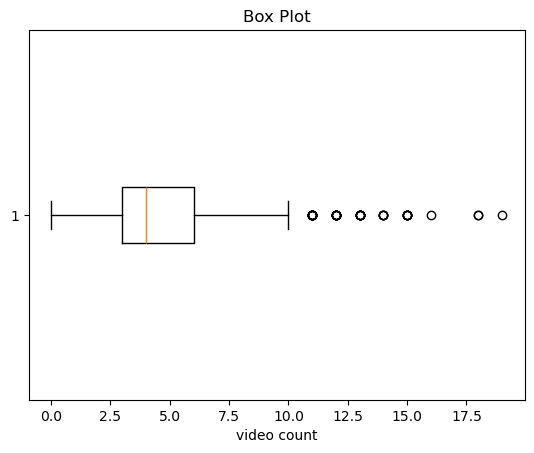

In [6]:
v_data=telecom_df["videos_watched"]
plt.boxplot(v_data, vert=False)
plt.title("Box Plot")
plt.xlabel("video count")
plt.show()

<Axes: >

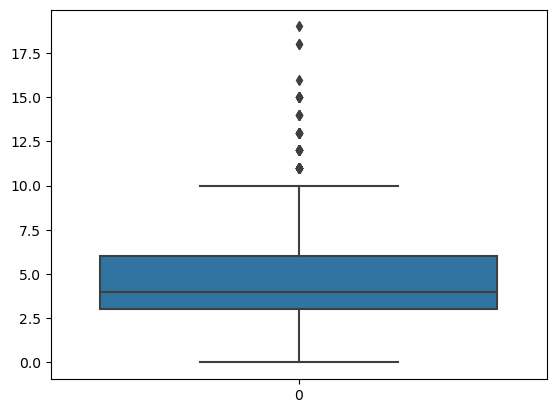

In [7]:
v_data=telecom_df["videos_watched"]
sns.boxplot(v_data)


<Axes: >

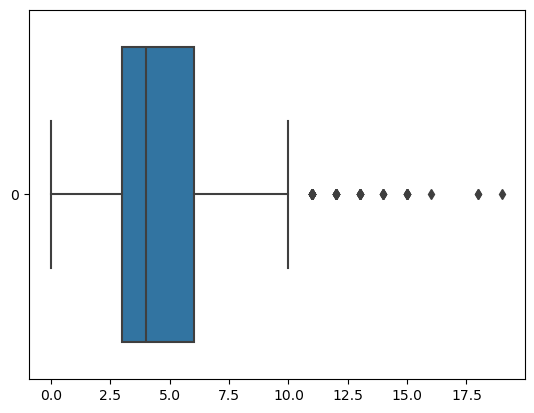

In [8]:
v_data=telecom_df["videos_watched"]
sns.boxplot(v_data, orient='h')

**Hiatigram and boxplot side by side**

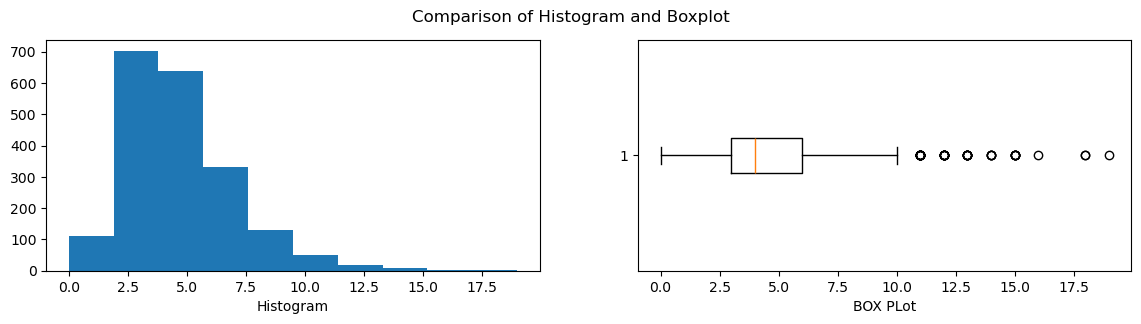

In [9]:
v_data=telecom_df['videos_watched']
plt.figure(figsize=(14,3))
plt.suptitle('Comparison of Histogram and Boxplot')
plt.subplot(1,2,1)
plt.hist(v_data, bins=10)
plt.xlabel("Histogram")
plt.subplot(1,2,2)
plt.boxplot(v_data, vert=False)
plt.xlabel("BOX PLot")
plt.show()

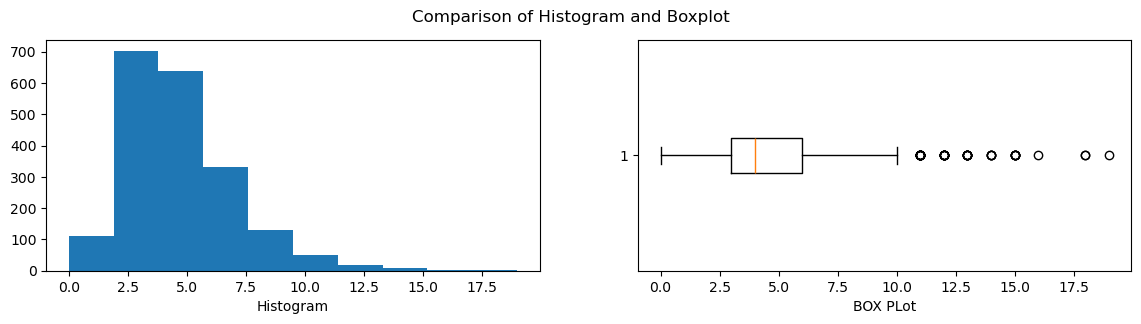

In [7]:
v_data=telecom_df['videos_watched']
plt.figure(figsize=(14,3))

plt.suptitle('Comparison of Histogram and Boxplot')
plt.subplot(1,2,1).hist(v_data, bins=10)
plt.xlabel("Histogram")

plt.subplot(1,2,2).boxplot(v_data, vert=False)
plt.xlabel("BOX PLot")
plt.show()

**Finding the outliers**

- Outlier available less than Q3+ 1.5*IQR and Q1-1.5*IQR

- Step 1 : Calculate 25p, 50p, 75p

- Step 2: Calculate Q3-Q1

- Step 3: Calculate LB= Q1-1.5*IQR and
                    UB= Q3+ 1.5*IQR

- step 4: Con1= data < LB
          Con1= data > LB
        

In [9]:
v_data=telecom_df['videos_watched']
q1=np.percentile(v_data,25)
q2=np.percentile(v_data,50)
q3=np.percentile(v_data,75)

IQR=q3-q1

LB= q1-1.5*IQR

UB= q3+ 1.5*IQR

con1=v_data <LB
con2=v_data>UB

con3=con1 | con2 

Outliers_Data=v_data[con3]
Outliers_Data


79      14
169     11
177     13
260     11
369     18
377     15
489     11
555     11
578     15
607     11
690     13
744     12
758     15
791     11
946     12
1018    15
1033    13
1174    11
1185    13
1230    11
1248    11
1290    12
1330    13
1339    13
1341    13
1361    12
1367    14
1395    11
1409    11
1478    12
1539    11
1580    12
1588    19
1591    14
1613    11
1615    12
1647    12
1648    13
1659    15
1740    11
1821    18
1849    11
1864    11
1926    11
1928    14
1930    11
1962    12
1970    15
1984    12
1994    11
1997    16
Name: videos_watched, dtype: int64

In [18]:
v_data=telecom_df['videos_watched']
q1=np.percentile(v_data,25)
q2=np.percentile(v_data,50)
q3=np.percentile(v_data,75)

IQR=q3-q1

LB= q1-1.5*IQR

UB= q3+ 1.5*IQR

con1=v_data >LB
con2=v_data <UB

con3=con1 & con2 

Non_Outliers_Data=telecom_df[con3]
Non_Outliers_Data

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,2015,996129,401-3170,Male,36,127,no,no,303.15,11.5,34.36,113,3,4.0,2,NaN
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


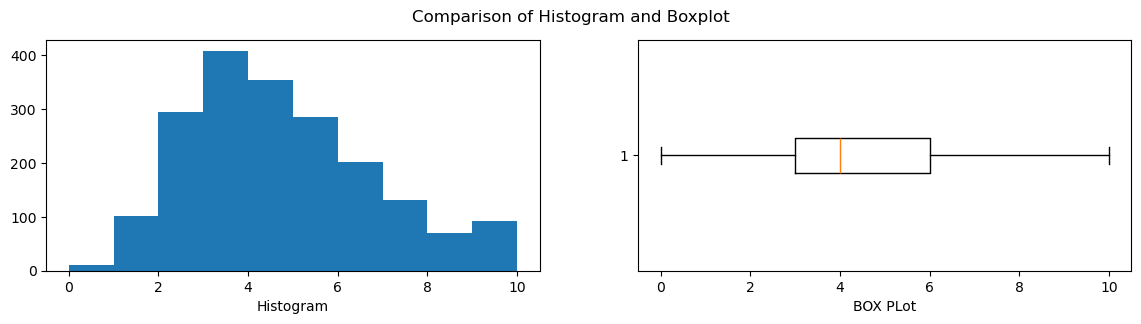

In [19]:
v_data_non_outlier=Non_Outliers_Data['videos_watched']
plt.figure(figsize=(14,3))
plt.suptitle('Comparison of Histogram and Boxplot')
plt.subplot(1,2,1)
plt.hist(v_data_non_outlier, bins=10)
plt.xlabel("Histogram")
plt.subplot(1,2,2)
plt.boxplot(v_data_non_outlier, vert=False)
plt.xlabel("BOX PLot")
plt.show()

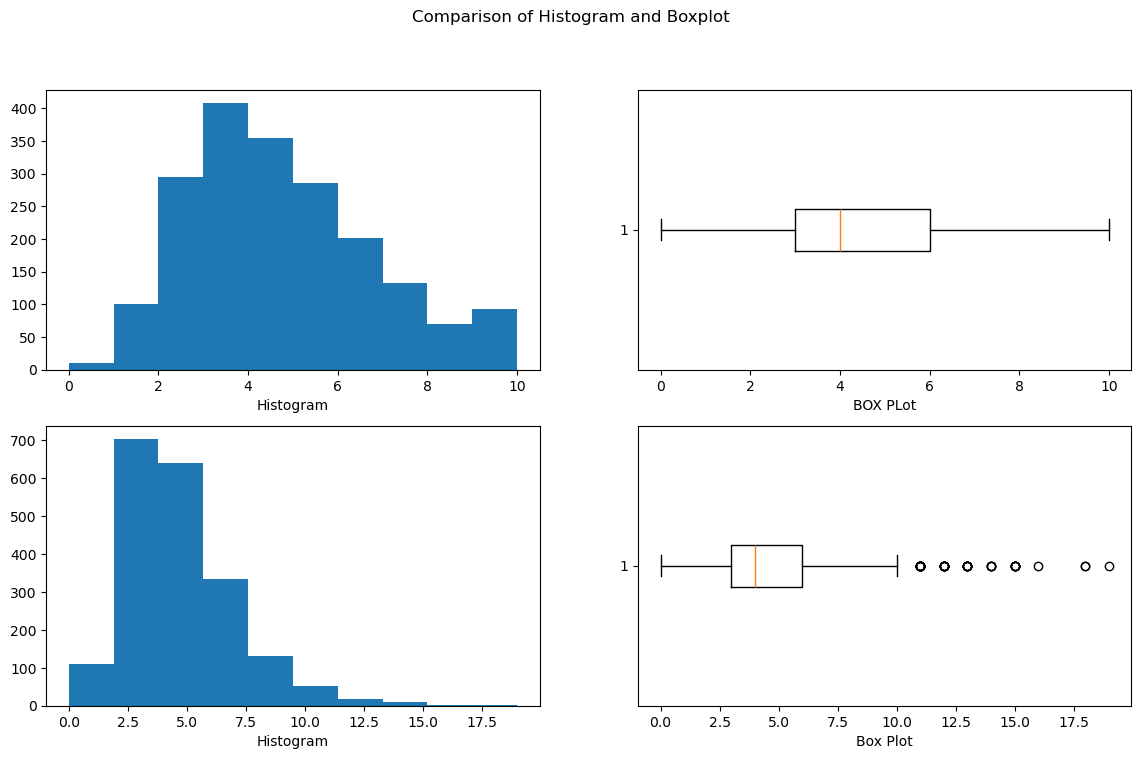

In [23]:
v_data_non_outlier=Non_Outliers_Data['videos_watched']

v_data=telecom_df['videos_watched']

plt.figure(figsize=(14,8))
plt.suptitle('Comparison of Histogram and Boxplot')

plt.subplot(2,2,1)
plt.hist(v_data_non_outlier, bins=10)
plt.xlabel("Histogram")

plt.subplot(2,2,2)
plt.boxplot(v_data_non_outlier, vert=False)
plt.xlabel("BOX PLot")

plt.subplot(2,2,3)
plt.hist(v_data, bins=10)
plt.xlabel("Histogram")

plt.subplot(2,2,4)
plt.boxplot(v_data, vert=False)
plt.xlabel("Box Plot")

plt.show()


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

telecom_df=pd.read_csv('telecom_churn_data.csv')
telecom_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [27]:
cat_column=telecom_df.select_dtypes(include= object).columns
cat_column

Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [28]:
num_column=telecom_df.select_dtypes(exclude= object).columns
num_column

Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

(array([111., 703., 639., 333., 131.,  51.,  18.,  10.,   1.,   3.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

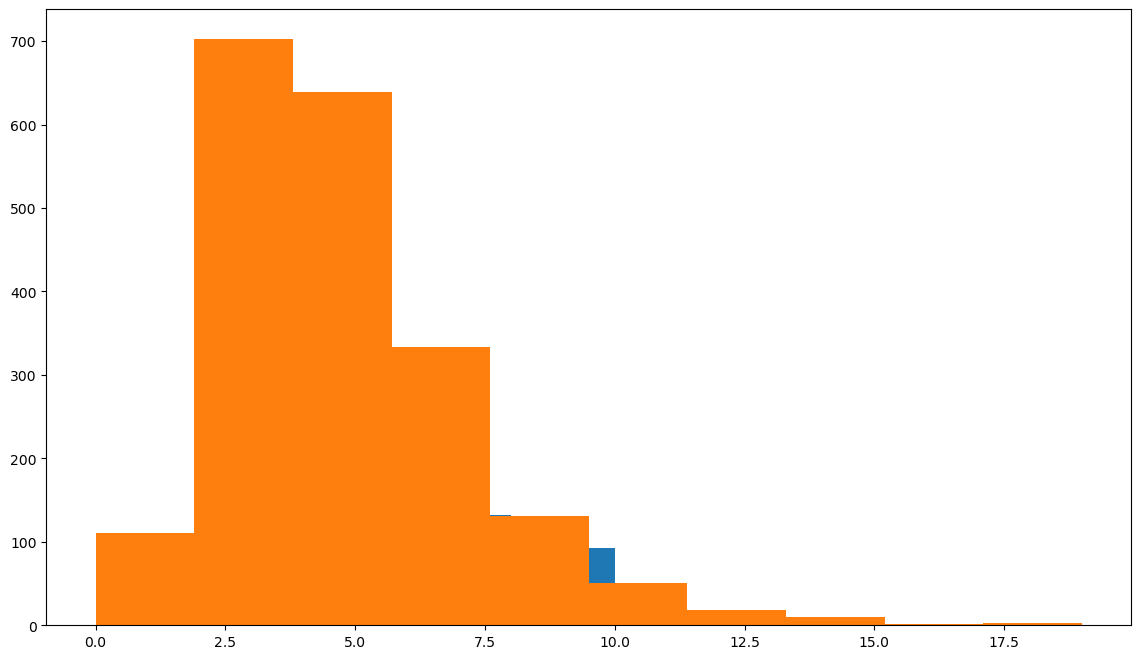

In [30]:
v_data_non_outlier=Non_Outliers_Data['videos_watched']

v_data=telecom_df['videos_watched']

plt.figure(figsize=(14,8))

plt.hist(v_data_non_outlier)

plt.hist(v_data)

**How to deal with Outliers**

- we can drop the outlier is easy task but not recommended

- if we drop outlires means we are droping rows which mean we are droping other columns values

- means loosing important data fron column value

-(In industry)if outlier percentage is less than 2% the we can drop data 


**Isolation Forest**

  - ML Model used to find the outliers and anomolies

**Filled with median Value**

**np.where**

- mwthod having 3 arguments- 1. Condition

  
                            2. value if condition is True

  
                            3. value if condition is False

In [10]:
for value in v_data:
    print(value)

1
3
1
4
7
6
4
9
5
2
9
3
1
1
5
4
4
2
8
1
8
8
5
2
6
2
5
3
2
4
3
9
4
3
8
4
3
10
4
3
5
2
1
8
5
2
7
4
4
7
5
5
3
4
5
5
3
1
3
3
4
2
3
5
4
3
4
7
3
3
6
7
4
5
7
7
3
4
3
14
4
3
2
5
6
2
9
7
7
5
7
8
4
7
2
1
3
3
4
5
2
1
2
6
2
2
4
4
3
1
3
3
2
4
3
3
5
6
4
2
2
6
4
2
5
1
2
3
3
2
3
2
5
2
3
6
5
3
1
1
5
6
5
4
8
6
7
3
4
3
8
7
4
3
3
3
7
4
2
0
4
6
2
4
2
6
3
6
3
11
1
4
6
3
3
8
4
13
6
5
2
4
4
7
2
7
2
3
2
4
9
2
6
2
1
2
4
5
3
9
3
2
5
8
10
9
4
4
7
6
4
6
5
10
8
6
3
5
3
3
6
6
4
3
3
8
4
4
6
5
3
2
3
2
3
4
2
3
9
4
4
4
3
3
2
3
3
3
7
3
6
3
2
2
3
7
4
2
1
2
11
3
1
7
4
10
5
7
3
7
8
0
1
4
5
4
5
3
6
1
3
6
3
6
9
4
1
3
3
2
5
4
5
3
5
5
3
5
3
4
1
1
10
3
7
2
5
5
4
3
3
7
3
3
1
6
2
0
1
9
6
3
3
2
3
3
3
4
3
5
3
6
4
5
2
9
3
0
4
3
4
3
10
6
6
3
5
2
4
4
2
4
6
4
3
3
4
4
4
3
4
8
3
4
2
2
2
5
2
18
6
4
7
9
3
4
3
15
6
5
7
5
3
3
2
4
6
4
1
4
4
3
3
9
3
6
8
9
3
1
5
1
5
9
9
2
1
2
5
9
4
5
5
7
10
5
4
5
5
0
5
3
9
0
4
6
3
3
3
4
3
1
4
5
4
3
4
4
3
4
2
6
2
2
4
3
2
3
4
4
4
7
0
3
5
3
4
4
4
5
4
3
3
7
3
2
5
2
4
3
8
5
5
4
7
6
6
3
3
6
9
3
7
4
4
2
4
6
4
11
6
8
5


In [14]:
dict1={'Subject':['AI','ML','DS', 'EDA','NLP'],
      'Marks':['100','200','300','400','500']}
df=pd.DataFrame(dict1)
df

,Subject,Marks
0,AI,100
1,ML,200
2,DS,300
3,EDA,400
4,NLP,500


In [19]:
# I want replace marks with 1 , which are greater than 10
dict1={'Subject':['AI','ML','DS', 'EDA','NLP'],
      'Marks':[100,200,300,400,500]}
df=pd.DataFrame(dict1)

l=[]
for i in df.Marks:
    if i > 200:
        l.append(2)
    else:
        l.append(i)
df['Marks']=l
df

,Subject,Marks
0,AI,100
1,ML,200
2,DS,2
3,EDA,2
4,NLP,2


In [26]:
dict1={'Subject':['AI','ML','DS', 'EDA','NLP'],
      'Marks':[100,200,300,400,500]}
df=pd.DataFrame(dict1)
df

,Subject,Marks
0,AI,100
1,ML,200
2,DS,300
3,EDA,400
4,NLP,500


In [27]:
con=df['Marks']>100
l=np.where(con,2,df['Marks'])
df['Marks']=l
df

,Subject,Marks
0,AI,100
1,ML,2
2,DS,2
3,EDA,2
4,NLP,2


In [28]:
v_data=telecom_df['videos_watched']
con1=v_data<LB
con1=v_data>UB
con=con1|con2

v_median=v_data.median()
l=np.where(con,v_median,v_data)
l


array([1., 3., 1., ..., 4., 6., 6.])

In [29]:
telecom_df['videos_watched_update']=l

(array([ 10., 101., 295., 408., 405., 285., 201., 132.,  70.,  93.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

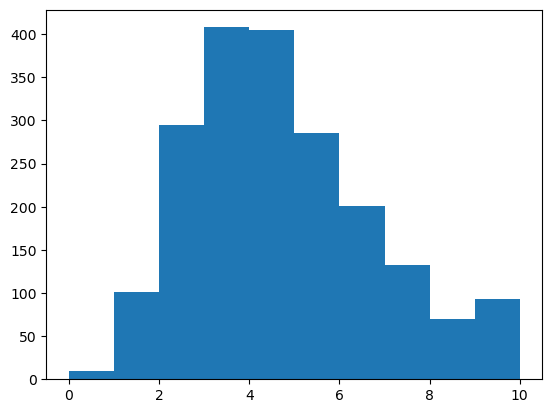

In [30]:
plt.hist(telecom_df['videos_watched_update'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f7cd28e590>,
 'caps': [<matplotlib.lines.Line2D at 0x1f7cd28fa90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f7cd28dcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f7cd2989d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f7cd299250>],
 'means': []}

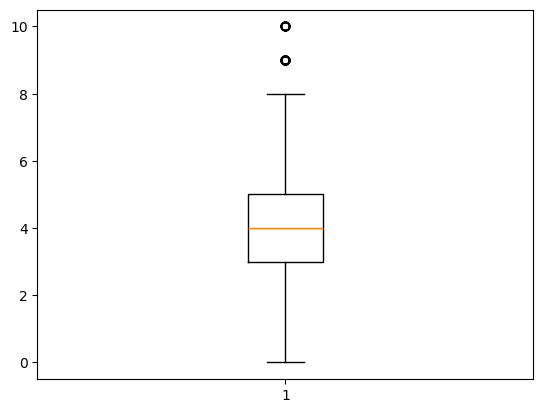

In [31]:
plt.boxplot(telecom_df['videos_watched_update'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f7cd46fe90>,
 'caps': [<matplotlib.lines.Line2D at 0x1f7cd47d2d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f7cd46f510>],
 'medians': [<matplotlib.lines.Line2D at 0x1f7cd47e450>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f7cd47ecd0>],
 'means': []}

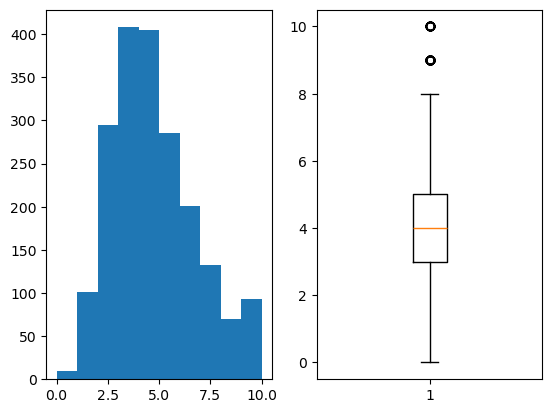

In [32]:
plt.subplot(1,2,1)
plt.hist(telecom_df['videos_watched_update'])

plt.subplot(1,2,2)
plt.boxplot(telecom_df['videos_watched_update'])